# Read in Data and Initial Exploration

In [1]:
##Import a number of packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.tokenize import MWETokenizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from numpy import dot
from numpy.linalg import norm
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


import re
import string

from textblob import TextBlob

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()



In [2]:
df = pd.read_csv("dsotm_reviews.csv")


In [3]:
## Series for reviews only

reviews_only = df.Review

In [4]:
## Series for ratings only

rating_only = df.Rating

In [5]:
df.head()

,Review,Rating
0,"""More has been said about Dark Side of the Moo...",4.5
1,What can I possibly say about an album that no...,5.0
2,You know for a band that spent several albums ...,2.0
3,Has finally clicked with me in full ...,4.0
4,So why are people afraid to say this...,4.5


In [6]:
## Appears to be 1548 even though the dataset is supposed to have 1544 records

len(reviews_only)

1548

In [7]:
## Creating a list where each item is a review
lista = [x for x in reviews_only]

In [8]:
len(lista)

1548

In [9]:
## Function to count number of words per review

mean_list = []
for i in lista:
    if type(i) != float:
        x = i.split()
        leng = len(x)
        mean_list.append(leng)
        
print('Average number of words per review: {}'.format(np.mean(mean_list)))

Average number of words per review: 138.26308985132513


In [10]:
counter = 0
for i in lista:
    counter += 1 
    if type(i) == float:
        print(i, counter)

nan 1347


In [11]:
df.iloc[1346][0]

nan

In [12]:
## Dropping null value

df.drop([df.index[1346]], inplace = True)

In [13]:
## Series for reviews 

reviews_only = df.Review

In [14]:
## Series for ratings 

rating_only = df.Rating

In [15]:
## df.iloc[1342][0]

In [16]:
print(mean_list[:5])

[319, 621, 703, 289, 154]


In [17]:
for i in lista:
    if type(i) == str and len(i) < 10:
        print(i)

So-so.
eh
顶峰
Classic.
Fantastic
EPIC
classic
INSANE!!
Quality!
Superb
great
Dull
Classic.
awsome
glorious


In [18]:
counter = 0
for i in lista:
    if type(i) == str and len(i) > 12:
        counter += 1 

print(counter)

1524


In [19]:
print(len(rating_only))

1547


In [20]:
rating_only

0       4.5
1       5.0
2       2.0
3       4.0
4       4.5
       ... 
1543    5.0
1544    4.5
1545    5.0
1546    1.0
1547    1.0
Name: Rating, Length: 1547, dtype: float64

In [21]:
## Number of reviews without a rating
df['Rating'].isna().sum()

53

In [22]:
print("There are", 1547-53, "reviews without a rating")

There are 1494 reviews without a rating


In [23]:
print("The average rating is:", (df['Rating'].mean()))

The average rating is: 4.393574297188755


In [24]:
## Probably will go back and change this to break into fewer categories
## Histogram? 
df.Rating.value_counts(normalize=True)

5.0    0.562918
4.5    0.157965
4.0    0.101071
3.5    0.056894
3.0    0.042169
2.5    0.026774
2.0    0.019411
1.0    0.014726
0.5    0.009371
1.5    0.008701
Name: Rating, dtype: float64

In [25]:
## Questions for myself:
## 1) Should I remove punctuation, capital letters, numbers, stop words?
## 2) Should I chunk before tokenizing?
## 3) Should I use stemming, named entity recognition, correct mispellings, look at other languages?

In [26]:
## Pre-processing to remove numbers, capital letters, punctuation 

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), " ", x.lower())

df["Review"] = df.Review.map(alphanumeric).map(punc_lower)

<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
/var/folders/nl/tr7pjkb958q6d3m6cvyj6qfh0000gn/T/ipykernel_2893/1267529906.py:3: DeprecationWarning: invalid escape sequence \w
  alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)


In [27]:
df.head()

,Review,Rating
0,more has been said about dark side of the moo...,4.5
1,what can i possibly say about an album that no...,5.0
2,you know for a band that spent several albums ...,2.0
3,has finally clicked with me in full ...,4.0
4,so why are people afraid to say this...,4.5


# Count Vectorizer 1

In [28]:
vec = CountVectorizer()

In [29]:
reviews_vectorized = vec.fit_transform(reviews_only)

reviews_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
pd.unique(reviews_vectorized.toarray().reshape(-1))

array([  0,   1,   2,   5,   4,   8,   6,   3,   7,  10,  12,   9,  13,
        18,  22,  14,  48,  17,  16,  15,  11,  40,  19,  21,  30,  70,
        39,  25,  28,  45,  20,  94,  26,  23,  31,  49,  46,  24,  90,
        38,  27,  82,  54,  91,  37,  29, 159,  79,  88,  41,  51, 139,
        42,  35,  67,  32,  33,  57, 115,  44,  84,  66, 176,  52,  78,
        47,  81,  93,  62, 137,  60,  55, 133,  56, 121,  71,  63,  64,
        53, 141,  36,  59,  77, 118,  50,  61,  43,  99, 105,  76, 185,
        83,  34,  68, 395, 172, 131, 228,  69, 225, 109,  73,  96, 108])

In [31]:
## List of all words in corpus and number of times they appear
vec.vocabulary_

{'more': 9260,
 'has': 6564,
 'been': 1308,
 'said': 13287,
 'about': 24,
 'dark': 3441,
 'side': 13804,
 'of': 10515,
 'the': 15263,
 'moon': 9247,
 'than': 15253,
 'will': 16700,
 'ever': 5085,
 'be': 1269,
 'necessary': 9585,
 'both': 1635,
 'positive': 11599,
 'and': 563,
 'negative': 9602,
 'see': 13486,
 'no': 10192,
 'reason': 12498,
 'to': 15448,
 'assess': 898,
 'albums': 382,
 'actual': 161,
 'music': 9357,
 'in': 7126,
 'this': 15322,
 'review': 12972,
 'as': 857,
 'my': 9406,
 'fondness': 5732,
 'for': 5744,
 'it': 7630,
 'is': 7607,
 'likely': 8243,
 'rooted': 13154,
 'same': 13314,
 'reasoning': 12501,
 'emotion': 4670,
 'most': 9278,
 'other': 10717,
 'people': 11136,
 'who': 16669,
 'rank': 12389,
 'amongst': 532,
 'best': 1392,
 'theyve': 15306,
 'heard': 6616,
 'still': 14522,
 'feel': 5491,
 'some': 14143,
 'obligation': 10440,
 'explain': 5230,
 'myself': 9408,
 'many': 8683,
 'critically': 3222,
 'acclaimed': 90,
 'have': 6586,
 'fallen': 5370,
 'short': 13756,
 't

In [32]:
## 1547 reviews with 19013 distinct words total 
reviews_vectorized.shape

(1547, 18857)

In [33]:
print(vec)

CountVectorizer()


#  Vectorizer Binary

In [34]:
vec = CountVectorizer(binary = True)

In [35]:
reviews_binary_vectorized = vec.fit_transform(reviews_only)

In [36]:
reviews_binary_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
pd.unique(reviews_binary_vectorized.toarray().reshape(-1))

array([0, 1])

In [38]:
reviews_only[245]

'          what turned me on to pink floyd in the first place was their heavy oppressively dark tone that permeates throughout their discography  the crisp basslines and odd vocals distinguish themselves entirely from anything else ive heard  as for the album itself unlike many other prog rock albums ive heard this really feels like an  album experience  as opposed to a collection of tracks  they all flow together seamlessly and create an overwhelming dark tone  passionate and pessimistic inventive and powerful this album is a masterpiece  '

In [39]:
i = 245

words_count_binary = pd.Series(name=reviews_only[i],
                data=reviews_binary_vectorized.toarray()[i], 
                index=vec.get_feature_names()) \
        .sort_values(ascending=False)

words_count_binary[:20]

oppressively    1
album           1
crisp           1
first           1
tracks          1
flow            1
floyd           1
overwhelming    1
for             1
tone            1
together        1
rock            1
powerful        1
collection      1
odd             1
what            1
to              1
of              1
dark            1
else            1
Name:           what turned me on to pink floyd in the first place was their heavy oppressively dark tone that permeates throughout their discography  the crisp basslines and odd vocals distinguish themselves entirely from anything else ive heard  as for the album itself unlike many other prog rock albums ive heard this really feels like an  album experience  as opposed to a collection of tracks  they all flow together seamlessly and create an overwhelming dark tone  passionate and pessimistic inventive and powerful this album is a masterpiece  , dtype: int64

## TFIDF Vectorize

In [40]:
t_vec = TfidfVectorizer(stop_words='english',
                          lowercase = True,
                          token_pattern = r'\b[a-zA-Z]{3,}\b',
                          max_df=.8,
                          min_df = .01)

In [41]:
reviews_t_vectorized = t_vec.fit_transform(reviews_only.values)

In [42]:
reviews_t_vectorized.shape

(1547, 815)

In [43]:
i = 309

word_freq_tfidf = pd.Series(name=reviews_only[i],
                data=reviews_t_vectorized.toarray()[i], 
                index=t_vec.get_feature_names()) \
        .sort_values(ascending=False)

word_freq_tfidf.head()

say         0.645192
wish        0.405262
better      0.371694
know        0.363804
greatest    0.351368
Name:  boomers will say its the greatest album of all timenzoomers will say its overratedntrue patricians know that wish you were here has always been better , dtype: float64

In [44]:
print(reviews_t_vectorized)

  (0, 603)	0.06553899482620726
  (0, 455)	0.09367244388082006
  (0, 250)	0.13299488746410978
  (0, 171)	0.07037970439728417
  (0, 317)	0.1297588327637588
  (0, 21)	0.1297588327637588
  (0, 226)	0.09319024584332755
  (0, 478)	0.11487922990815352
  (0, 24)	0.12350966084500398
  (0, 245)	0.0538723953166695
  (0, 527)	0.055221444866644355
  (0, 188)	0.12781059236322134
  (0, 277)	0.06602427418943617
  (0, 749)	0.10194786745308572
  (0, 104)	0.11324546102437823
  (0, 234)	0.12600163501863035
  (0, 232)	0.13952173637053836
  (0, 335)	0.1297588327637588
  (0, 635)	0.1112192093708674
  (0, 327)	0.1287659748609147
  (0, 636)	0.09819066970795726
  (0, 471)	0.13540762954940505
  (0, 665)	0.1476032082147168
  (0, 227)	0.13540762954940505
  (0, 500)	0.11221206727371147
  :	:
  (1545, 274)	0.1945353341410361
  (1545, 342)	0.1790379577506562
  (1545, 39)	0.17266907058328332
  (1545, 416)	0.18513345093652153
  (1545, 444)	0.18713546599042036
  (1545, 352)	0.10877243463085719
  (1545, 658)	0.1230251824

## Count Vectorizer, max_df used

In [45]:
max_vec = CountVectorizer(stop_words='english',
                          lowercase = True,
                          token_pattern = r'\b[a-zA-Z]{3,}\b',
                          max_df=.8)

In [46]:
max_vectorized = max_vec.fit_transform(reviews_only) 


In [47]:
max_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
"the" in max_vec.get_feature_names()

False

In [49]:
"is" in max_vec.get_feature_names()

False

In [50]:
max_vectorized.shape

(1547, 15460)

In [51]:
stemmer = SnowballStemmer("english")

In [52]:
def prep(word, stemmer=None):
    
    with open('stop_words_english_c.txt', 'r') as f:
        stopwords = [s.strip() for s in f.readlines()]
        
    if word.lower() in stopwords:
        return None
    
    elif stemmer is None:
        return word.lower()
    
    else:
        return stemmer.stem(word)

In [53]:
max_vec = CountVectorizer(stop_words=['english', 'spanish'],
                          lowercase = True,
                          token_pattern = r'\b[a-zA-Z]{3,}\b',
                          max_df=.8,
                          min_df = .01)

In [54]:
max_vectorized = max_vec.fit_transform(reviews_only)

max_vectorized.toarray()

array([[1, 2, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [55]:
max_vectorized.shape


(1547, 1009)

In [56]:
max_vec.get_feature_names()[2000:4000]

[]

In [57]:
max_vectorized = max_vec.fit_transform(reviews_only).toarray()


In [58]:
pd.DataFrame(max_vectorized, columns =max_vec.get_feature_names())

,able,about,above,absolute,absolutely,accessible,achievement,across,actual,actually,...,years,yes,yet,you,youll,young,your,youre,yourself,youve
0,1,2,0,0,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,1,...,0,0,0,5,0,0,2,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,1,0,1,2,0,0,1,0,0,1
3,0,0,0,0,1,0,0,0,0,1,...,3,1,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## PCA 

In [59]:
pca = PCA(n_components=20)

In [60]:
X = pca.fit_transform(max_vectorized)

In [61]:
def show_variance_explained_plots(pca):
    
    var_exp_array = pca.explained_variance_ratio_
    n_comps = var_exp_array.shape[0] 
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    
    ax[0].fill_between(range(n_comps), var_exp_array)
    ax[0].set_title('Variance Explained by Nth Principal Component')
    
    ax[1].fill_between(range(n_comps), np.cumsum(var_exp_array))
    ax[1].set_title('Cumulative Variance Explained by N Components')
    
    plt.show()

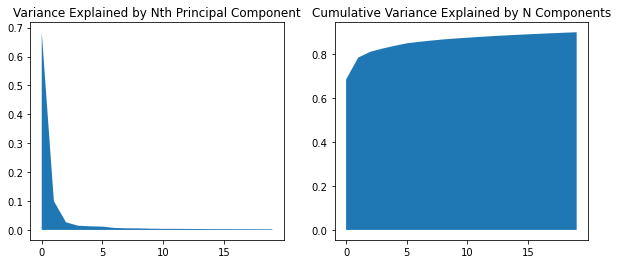

In [62]:
show_variance_explained_plots(pca) 

In [63]:
print(X)

[[ 6.05999549 -0.87119251  6.54004134 ...  0.92927574 -0.8688669
   0.67545081]
 [46.37311075 -0.11827661 -6.51131949 ... -3.72187972 -1.09616289
   2.47664313]
 [37.64251247 -0.31416752 -2.57169566 ... -1.55272233  0.96111328
   0.45382202]
 ...
 [-8.81297525 -0.36496288 -0.83857565 ...  0.33561232  0.2443307
   0.11925233]
 [-5.38479895 -0.53154088  0.58084779 ...  0.14840713  0.05395759
   0.30953261]
 [-5.17365557 -0.41888616 -0.90961238 ...  0.09579204  0.63632398
   0.27738168]]


In [64]:
from sklearn.cluster import KMeans

k_means_cluster = KMeans(n_clusters=2, random_state=3)

cluster_labels = k_means_cluster.fit_predict(X)

In [65]:
## goals for tomorrow implement PCA, LSA, and NMF 

Text(0.5, 0, '# components')

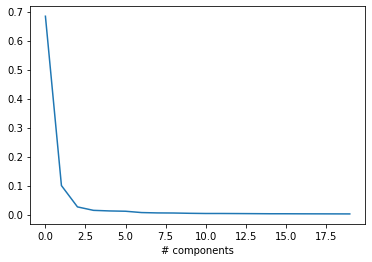

In [66]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("# components")

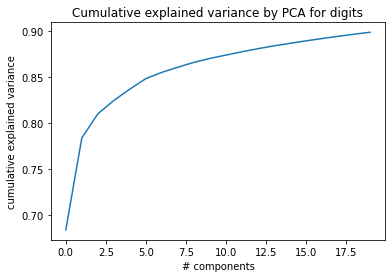

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

## LDA with pyLDAvis

In [68]:
tfidf_vectorizer = TfidfVectorizer(**max_vec.get_params())

In [69]:
tfidf_vectorized = tfidf_vectorizer.fit_transform(reviews_only)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1801: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [70]:
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(reviews_t_vectorized)

lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(tfidf_vectorized)


LatentDirichletAllocation(n_components=20, random_state=0)

## LSA

In [71]:
pd.DataFrame(max_vectorized, columns =max_vec.get_feature_names())

,able,about,above,absolute,absolutely,accessible,achievement,across,actual,actually,...,years,yes,yet,you,youll,young,your,youre,yourself,youve
0,1,2,0,0,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,1,...,0,0,0,5,0,0,2,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,1,0,1,2,0,0,1,0,0,1
3,0,0,0,0,1,0,0,0,0,1,...,3,1,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [72]:
lsa = TruncatedSVD(2)

In [73]:
doc_topic = lsa.fit_transform(max_vectorized)

In [74]:
## The first 2 topics explain the majority of the variance 

lsa.explained_variance_ratio_

array([0.68356962, 0.10003612])

In [75]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2"],
             columns = max_vec.get_feature_names())
topic_word

,able,about,above,absolute,absolutely,accessible,achievement,across,actual,actually,...,years,yes,yet,you,youll,young,your,youre,yourself,youve
component_1,0.002,0.043,0.002,0.002,0.004,0.001,0.001,0.003,0.002,0.007,...,0.011,0.004,0.006,0.119,0.001,0.001,0.022,0.008,0.002,0.003
component_2,-0.000,-0.006,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.001,...,-0.001,0.006,-0.001,-0.004,0.000,-0.000,-0.003,-0.001,-0.000,-0.001


In [76]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [77]:
display_topics(lsa, max_vec.get_feature_names(), 5)


Topic  0
the, and, this, that, album

Topic  1
que, los, con, por, del
